
Testing RF classifier

[Training Phase]

[Prediction Phase]

RF Accuracy: 0.9705


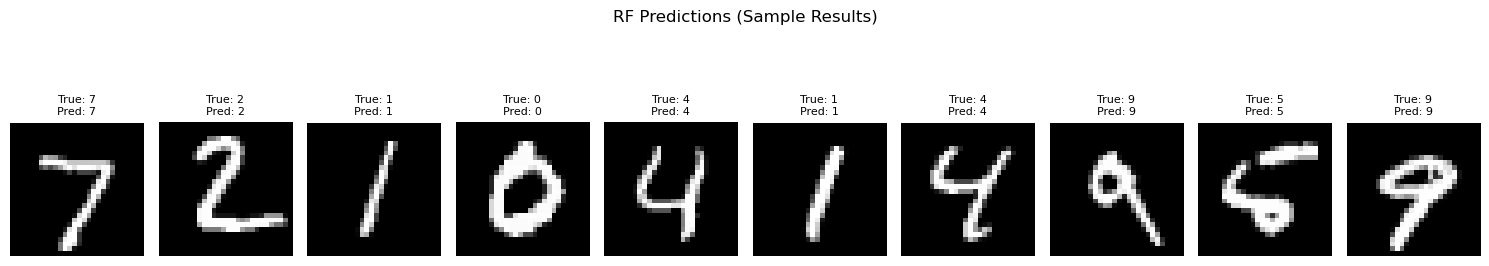


Testing NN classifier


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



[Training Phase]
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8136 - loss: 0.6503
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9593 - loss: 0.1405
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9727 - loss: 0.0926
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9787 - loss: 0.0722
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9830 - loss: 0.0554

[Prediction Phase]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

NN Accuracy: 0.9753


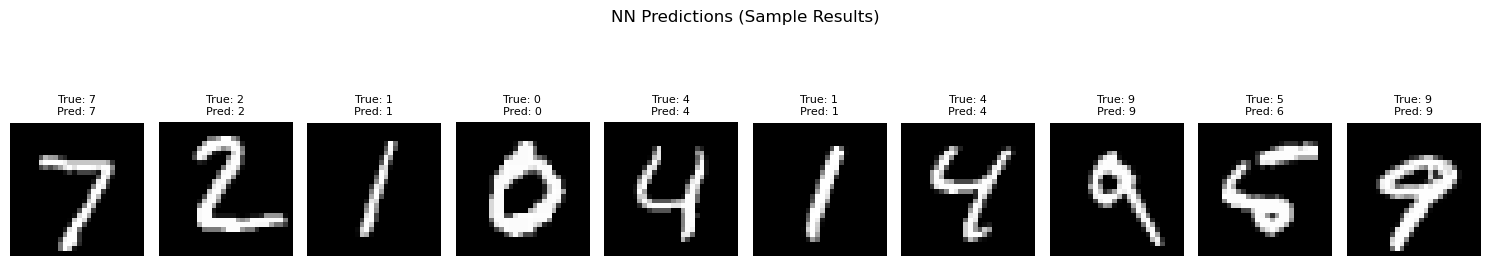


Testing CNN classifier

[Training Phase]


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 109ms/step - accuracy: 0.8719 - loss: 0.4366
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 117ms/step - accuracy: 0.9738 - loss: 0.0831
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 116ms/step - accuracy: 0.9803 - loss: 0.0621
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 137ms/step - accuracy: 0.9846 - loss: 0.0505
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 107ms/step - accuracy: 0.9859 - loss: 0.0431

[Prediction Phase]
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

CNN Accuracy: 0.9909


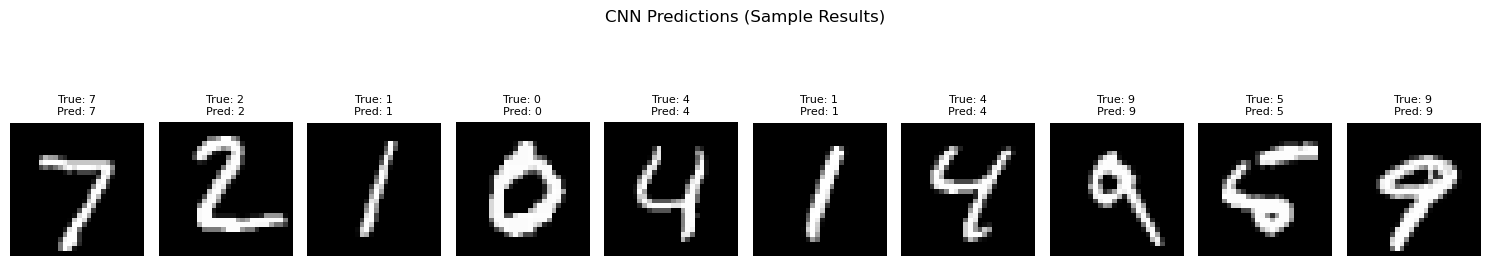


Algorithm Performance Summary:
RF: 0.9705
NN: 0.9753
CNN: 0.9909


In [1]:
"""
MNIST Classification Demo
Implementation of unified classifier with 3 algorithms
"""

# System path configuration
import os
import sys
from pathlib import Path

# Add project root to Python path
current_dir = Path.cwd()
project_root = current_dir.parent if current_dir.name == "notebook" else current_dir
sys.path.append(str(project_root))

# Core imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score

# Custom model imports
from models.interface import MnistClassifierInterface
from models.random_forest import RandomForestMnistClassifier
from models.ffnn import FeedForwardMnistClassifier
from models.cnn import ConvolutionalMnistClassifier

class MnistClassifier:
    """
    Unified classifier wrapper for MNIST dataset
    Handles algorithm selection and data preprocessing
    
    Parameters:
        algorithm (str): Model type selector - 'rf', 'nn', or 'cnn'
    """
    
    def __init__(self, algorithm: str):
        self.algorithm = algorithm.lower()
        self._validate_algorithm()
        self.model = self._init_model()
        self.preprocessor = self._get_preprocessor()
    
    def _validate_algorithm(self):
        """Ensure valid algorithm selection"""
        valid_algorithms = {'rf', 'nn', 'cnn'}
        if self.algorithm not in valid_algorithms:
            raise ValueError(f"Invalid algorithm: {self.algorithm}. Choose from {valid_algorithms}")
    
    def _init_model(self) -> MnistClassifierInterface:
        """Initialize selected model instance"""
        model_initializers = {
            'rf': lambda: RandomForestMnistClassifier(n_estimators=100),
            'nn': lambda: FeedForwardMnistClassifier(),
            'cnn': lambda: ConvolutionalMnistClassifier()
        }
        return model_initializers[self.algorithm]()
    
    def _get_preprocessor(self):
        """Get data preprocessing function for selected algorithm"""
        preprocessing_map = {
            'rf': lambda X: X.reshape(X.shape[0], -1),  # Flatten for RF
            'nn': lambda X: X.astype('float32') / 255.0,  # Normalize for FFNN
            'cnn': lambda X: (X.astype('float32') / 255.0)[..., np.newaxis]  # Add channel dim
        }
        return preprocessing_map[self.algorithm]
    
    def train(self, X_train, y_train, **kwargs):
        """
        Train selected model with preprocessing
        
        Args:
            X_train (np.ndarray): Training images (28x28)
            y_train (np.ndarray): Training labels
            **kwargs: Algorithm-specific training parameters
        """
        processed_X = self.preprocessor(X_train)
        self.model.train(processed_X, y_train, **kwargs)
    
    def predict(self, X_test):
        """
        Make predictions with selected model
        
        Args:
            X_test (np.ndarray): Test images (28x28)
        
        Returns:
            np.ndarray: Predicted labels
        """
        processed_X = self.preprocessor(X_test)
        return self.model.predict(processed_X)

# Main execution block
if __name__ == "__main__":
    # Load MNIST dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    # Test all classifiers
    results = {}
    for algo in ['rf', 'nn', 'cnn']:
        print(f"\n{'='*40}")
        print(f"Testing {algo.upper()} classifier")
        print(f"{'='*40}")
        
        # Initialize classifier
        classifier = MnistClassifier(algorithm=algo)
        
        # Configure training parameters
        train_args = {}
        if algo in ['nn', 'cnn']:
            train_args = {'epochs': 5, 'batch_size': 128}
        
        # Training phase
        print("\n[Training Phase]")
        classifier.train(X_train, y_train, **train_args)
        
        # Prediction phase
        print("\n[Prediction Phase]")
        predictions = classifier.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)
        results[algo] = accuracy
        print(f"\n{algo.upper()} Accuracy: {accuracy:.4f}")
        
        # Visualize first 10 predictions
        plt.figure(figsize=(15, 3))
        plt.suptitle(f"{algo.upper()} Predictions (Sample Results)", y=1.05)
        for i in range(10):
            plt.subplot(1, 10, i+1)
            plt.imshow(X_test[i], cmap='gray')
            plt.title(f"True: {y_test[i]}\nPred: {predictions[i]}", fontsize=8)
            plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    # Print final comparison
    print("\nAlgorithm Performance Summary:")
    for algo, acc in results.items():
        print(f"{algo.upper()}: {acc:.4f}")